In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import torch
from torch import autograd, nn
import torch.nn.functional as F
import torch.optim as optim
import functions as f

In [2]:
data = pd.read_csv('data_fs.dat', delim_whitespace=True, decimal=",")
f.add_bool(data)

### Data_train

In [3]:
x = data["x"][data['check'] == True]
y = data["y"][data['check'] == True]

X_train = np.stack((x.values, y.values), axis=1)
X_train = torch.from_numpy(X_train).float()

y_train = data["e"][data['check'] == True]
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())

#X_train, y_train

### Data_test

In [4]:
x = data["x"][data['check'] == False]
y = data["y"][data['check'] == False]

X_test = np.stack((x.values, y.values), axis=1)
X_test = torch.from_numpy(X_test).float()

y_test = data["e"][data['check'] == False]
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([85, 2]) torch.Size([85])
torch.Size([84, 2]) torch.Size([84])


### Set Parameters

In [5]:
input_size = 2
hidden_size = 7
activation_fun = nn.Tanh()
learning_rate = 0.001
epochs = 1000
loss_fun = nn.MSELoss()

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.hidden = nn.Linear(input_size, hidden_size)
        self.activation = activation_fun
        self.output = nn.Linear(hidden_size, 1)
        
    def forward(self, input):
        hidden = self.hidden(input)
        activated = self.activation(hidden)
        output = self.output(activated)
        
        return output

In [7]:
net = Net()
opt = optim.SGD(net.parameters(), lr=learning_rate) #che valore di lr usare??

In [8]:
net.eval()

y_pred = net(X_test)
y_pred = torch.squeeze(y_pred)
before_train = loss_fun(y_pred, y_test)
print('Test loss before Training' , before_train.item())

Test loss before Training 1.0114374160766602


In [9]:
net.train()

for epoch in range(epochs):
    opt.zero_grad()
    y_pred = net(X_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = loss_fun(y_train, y_pred)
    
    if epoch % 20 == 0:
        print('Epoch {}: train loss: {}'.format(epoch, train_loss.item()))
    
    train_loss.backward()
    opt.step()

Epoch 0: train loss: 1.0135986804962158
Epoch 20: train loss: 0.8843684196472168
Epoch 40: train loss: 0.7722435593605042
Epoch 60: train loss: 0.6747815012931824
Epoch 80: train loss: 0.5899386405944824
Epoch 100: train loss: 0.5159938335418701
Epoch 120: train loss: 0.45148688554763794
Epoch 140: train loss: 0.39517343044281006
Epoch 160: train loss: 0.3459867835044861
Epoch 180: train loss: 0.30300891399383545
Epoch 200: train loss: 0.2654469311237335
Epoch 220: train loss: 0.23261390626430511
Epoch 240: train loss: 0.20391300320625305
Epoch 260: train loss: 0.17882488667964935
Epoch 280: train loss: 0.15689623355865479
Epoch 300: train loss: 0.13773158192634583
Epoch 320: train loss: 0.12098513543605804
Epoch 340: train loss: 0.10635442286729813
Epoch 360: train loss: 0.09357478469610214
Epoch 380: train loss: 0.08241445571184158
Epoch 400: train loss: 0.07267015427350998
Epoch 420: train loss: 0.06416428834199905
Epoch 440: train loss: 0.05674093961715698
Epoch 460: train loss: 0.

In [10]:
net.eval()

y_pred = net(X_test)
y_pred = torch.squeeze(y_pred)
after_train = loss_fun(y_pred, y_test)
print('Test loss after Training' , after_train.item())

Test loss after Training 0.006835895590484142


Text(0.5, 1.0, 'Error')

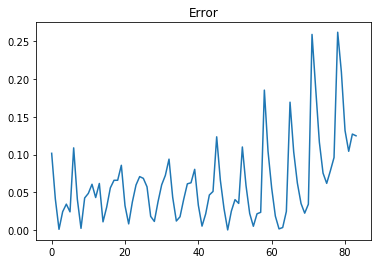

In [11]:
plt.plot(abs(net(X_test).view(-1) - y_test).detach().numpy())
plt.title('Error')